# Exercise 2: Shallow Neural Network and Gradient Descent

### Objective:
To understand the concept of a shallow neural network (a network with one hidden layer) and learn how the gradient descent algorithm optimizes the weights to minimize error.

We will:
- Create a simple binary dataset.
- Build a shallow neural network with one hidden layer.
- Implement forward propagation, cost computation, backward propagation, and parameter updates.
- Visualize the decision boundary.
- Experiment with exercises to strengthen understanding.


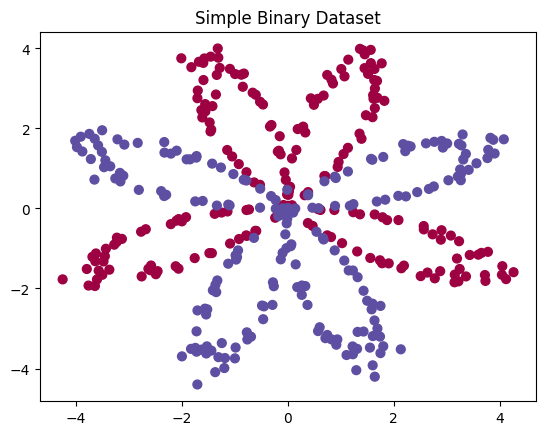

In [2]:
# Step 1: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
# Step 2: Generate simple binary dataset
np.random.seed(1)

m = 400  # number of examples
N = int(m / 2)  # points per class
D = 2           # dimensionality
X = np.zeros((m, D))
Y = np.zeros((m, 1), dtype='uint8')

for j in range(2):
    ix = range(N * j, N * (j + 1))
    t = np.linspace(j * 3.12, (j + 1) * 3.12, N)
    r = 4 * np.sin(4 * t) + np.random.randn(N) * 0.3
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    Y[ix] = j

plt.scatter(X[:, 0], X[:, 1], c=Y.flatten(), s=40, cmap=plt.cm.Spectral)
plt.title("Simple Binary Dataset")
plt.show()


### Step 3: Define the Network Structure

We define:
- Input layer → 2 neurons (for X₁, X₂)
- Hidden layer → 4 neurons
- Output layer → 1 neuron (binary output)


In [3]:
n_x = X.shape[1]
n_h = 4
n_y = 1


### Step 4: Initialize Parameters
Randomly initialize small weights and zero biases.


In [4]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}


### Step 5: Forward Propagation

Compute:
- Z₁ = W₁X + b₁ → A₁ = tanh(Z₁)
- Z₂ = W₂A₁ + b₂ → A₂ = sigmoid(Z₂)


In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward_propagation(X, parameters):
    W1, b1, W2, b2 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"]
    
    Z1 = np.dot(W1, X.T) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    return A2, cache


### Step 6: Compute Cost Function
Using **log loss** for binary classification.


In [6]:
def compute_cost(A2, Y):
    m = Y.shape[0]
    cost = -np.sum(Y.T * np.log(A2) + (1 - Y.T) * np.log(1 - A2)) / m
    return np.squeeze(cost)


### Step 7: Backward Propagation

Compute gradients for each layer:
- dZ₂, dW₂, db₂
- dZ₁, dW₁, db₁


In [7]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[0]
    W2 = parameters["W2"]
    A1, A2 = cache["A1"], cache["A2"]
    
    dZ2 = A2 - Y.T
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, X)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return grads


### Step 8: Update Parameters
Apply gradient descent update rule:


In [8]:
def update_parameters(parameters, grads, learning_rate=1.2):
    parameters["W1"] -= learning_rate * grads["dW1"]
    parameters["b1"] -= learning_rate * grads["db1"]
    parameters["W2"] -= learning_rate * grads["dW2"]
    parameters["b2"] -= learning_rate * grads["db2"]
    return parameters


### Step 9: Train the Neural Network
Combine all steps in one training function.


In [9]:
def nn_model(X, Y, n_h, num_iterations=10000, print_cost=True):
    n_x = X.shape[1]
    n_y = 1
    parameters = initialize_parameters(n_x, n_h, n_y)

    for i in range(num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads)

        if print_cost and i % 1000 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")
    return parameters


### Step 10: Predict Function
Predict class labels for the given input data.


In [10]:
def predict(parameters, X):
    A2, _ = forward_propagation(X, parameters)
    predictions = (A2 > 0.5).astype(int)
    return predictions


### Step 11: Train Model and Check Accuracy


In [12]:
parameters = nn_model(X, Y, n_h=4, num_iterations=5000)
predictions = predict(parameters, X)
accuracy = float((np.dot(Y.T, predictions.T) + np.dot(1 - Y.T, 1 - predictions.T)) / Y.size * 100)
print(f"Training Accuracy: {accuracy:.2f}%")


Iteration 0: Cost = 0.6930
Iteration 1000: Cost = 0.0677
Iteration 2000: Cost = 0.0547
Iteration 3000: Cost = 0.0490
Iteration 4000: Cost = 0.0457
Training Accuracy: 98.75%


C:\Users\sarop\AppData\Local\Temp\ipykernel_22372\3345906570.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accuracy = float((np.dot(Y.T, predictions.T) + np.dot(1 - Y.T, 1 - predictions.T)) / Y.size * 100)


### Step 12: Visualize the Decision Boundary


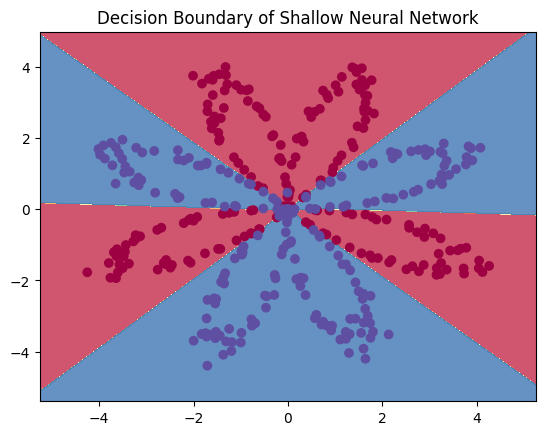

In [13]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = predict(parameters, np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y.flatten(), cmap=plt.cm.Spectral)
plt.title("Decision Boundary of Shallow Neural Network")
plt.show()


## Student Exercises

1. Change the number of hidden layer neurons (`n_h`) to 2, 6, 10 — observe the effect on accuracy and boundary.
2. Modify the `learning_rate` in `update_parameters()` to 0.5 or 2.0 and compare training convergence.
3. Plot **Cost vs Iterations** curve using a list to track the cost.
4. Replace `tanh` with `ReLU` activation and visualize how decision regions change.
5. Create an **XOR dataset** and test how the shallow neural network learns non-linear patterns.
